In [172]:
import numpy as np                               #import packages numpy(for numerical analysis)
import pandas as pd                              #import packages pandas(to generate univariate analysis)

import matplotlib.pyplot as plt                  #import packages matplotlib(generating visualization with pyplot)
import seaborn as sns                            #import packages seaborn(plot statistical graphs in python)

import os,sys,warnings
warnings.filterwarnings('ignore')                #standard libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn import metrics

In [3]:
usedcar_df=pd.read_csv('C:/D drive/sharan personal/INSAID GCD PROGRAMME/Data Science Projects/Machine Learning Projects/Used car prediction/TrainData.csv')    #read csv file using pandas
print('Data Shape:', usedcar_df.shape)           #shows how many rows and columns are available in data sets

Data Shape: (181, 27)


In [4]:
usedcar_df.head()                                #viewing first few rows of the dataset

,ID,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,...,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,-1,65,toyota,gas,std,four,hatchback,fwd,front,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,11248
1,2,0,188,bmw,gas,std,two,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
2,3,0,?,renault,gas,std,four,wagon,fwd,front,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
3,4,0,161,peugot,diesel,turbo,four,sedan,rwd,front,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
4,5,-2,103,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [5]:
usedcar_df.info()                                          #information about data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                181 non-null    int64  
 1   symboling         181 non-null    int64  
 2   normalizedlosses  181 non-null    object 
 3   make              181 non-null    object 
 4   fueltype          181 non-null    object 
 5   aspiration        181 non-null    object 
 6   numofdoors        181 non-null    object 
 7   bodystyle         181 non-null    object 
 8   drivewheels       181 non-null    object 
 9   enginelocation    181 non-null    object 
 10  wheelbase         181 non-null    float64
 11  length            181 non-null    float64
 12  width             181 non-null    float64
 13  height            181 non-null    float64
 14  curbweight        181 non-null    int64  
 15  enginetype        181 non-null    object 
 16  numofcylinders    181 non-null    object 
 1

In [9]:
usedcar_df.isna().sum()            #check if any missing values

ID                  0
symboling           0
normalizedlosses    0
make                0
fueltype            0
aspiration          0
numofdoors          0
bodystyle           0
drivewheels         0
enginelocation      0
wheelbase           0
length              0
width               0
height              0
curbweight          0
enginetype          0
numofcylinders      0
enginesize          0
fuelsystem          0
bore                0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
usedcar_df.describe()            #statistical information of dataframe

,ID,symboling,wheelbase,length,width,height,curbweight,enginesize,compressionratio,citympg,highwaympg,price
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,91.000000,0.850829,98.729282,174.174033,65.943646,53.709945,2564.165746,127.900552,10.154254,25.132597,30.646409,13271.314917
std,52.394338,1.267045,6.116197,12.336569,2.146114,2.497735,523.489016,42.578438,3.982306,6.418211,6.888545,8106.479635
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,46.000000,0.000000,94.500000,166.800000,64.200000,51.600000,2190.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,91.000000,1.000000,96.900000,173.200000,65.500000,54.100000,2420.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,136.000000,2.000000,102.400000,183.100000,66.600000,55.500000,2935.000000,146.000000,9.400000,30.000000,34.000000,16500.000000
max,181.000000,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


1.mean of curb-weight is more=2564.16 compared to other column means.

2.average price of car=13271.31

In [11]:
import sweetviz as sv
my_report =sv.analyze([usedcar_df,'Data'],target_feat='price')
my_report.show_html('EDA_usedcar_report.html')                         #automated EDA report


Report EDA_usedcar_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
sns.set_style('darkgrid')                        #setting style

<AxesSubplot:xlabel='price', ylabel='Density'>

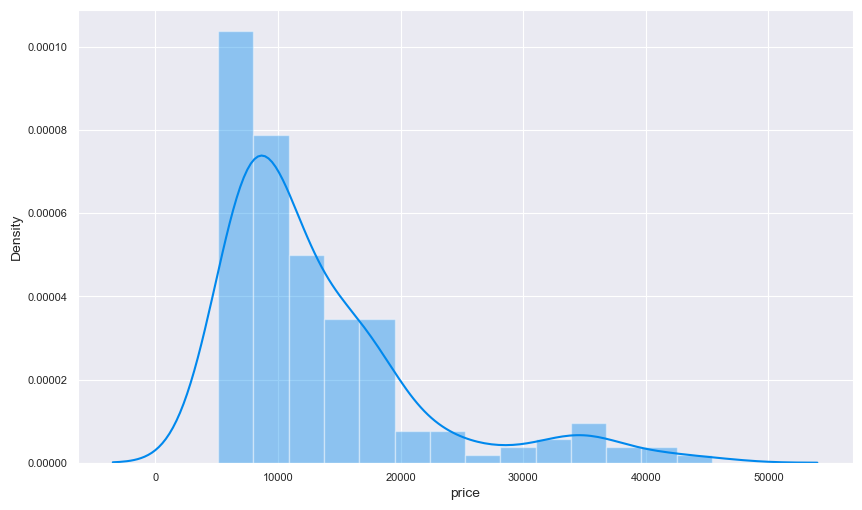

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(usedcar_df.price)                  #univariate analysis

I Used distanceplot to check tha analysis, i found that more number of cars ranges from 10000 to 13000 ranges, hence plot is rightly skewed.

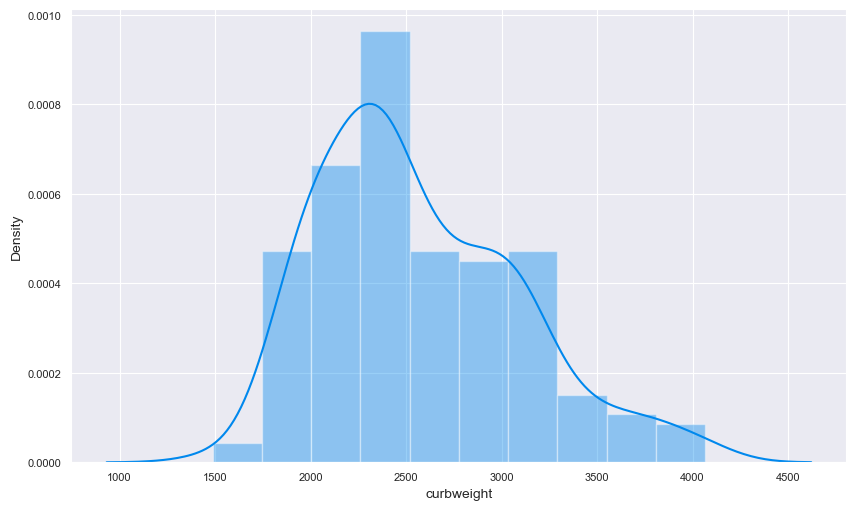

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(usedcar_df.curbweight);

mean=2564.16, mean of the curbweight was high compared to other columns.

In [22]:
all_cols = usedcar_df.columns
numerical_cols = usedcar_df._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)-set(numerical_cols))         #seperating numerical and categorical columns

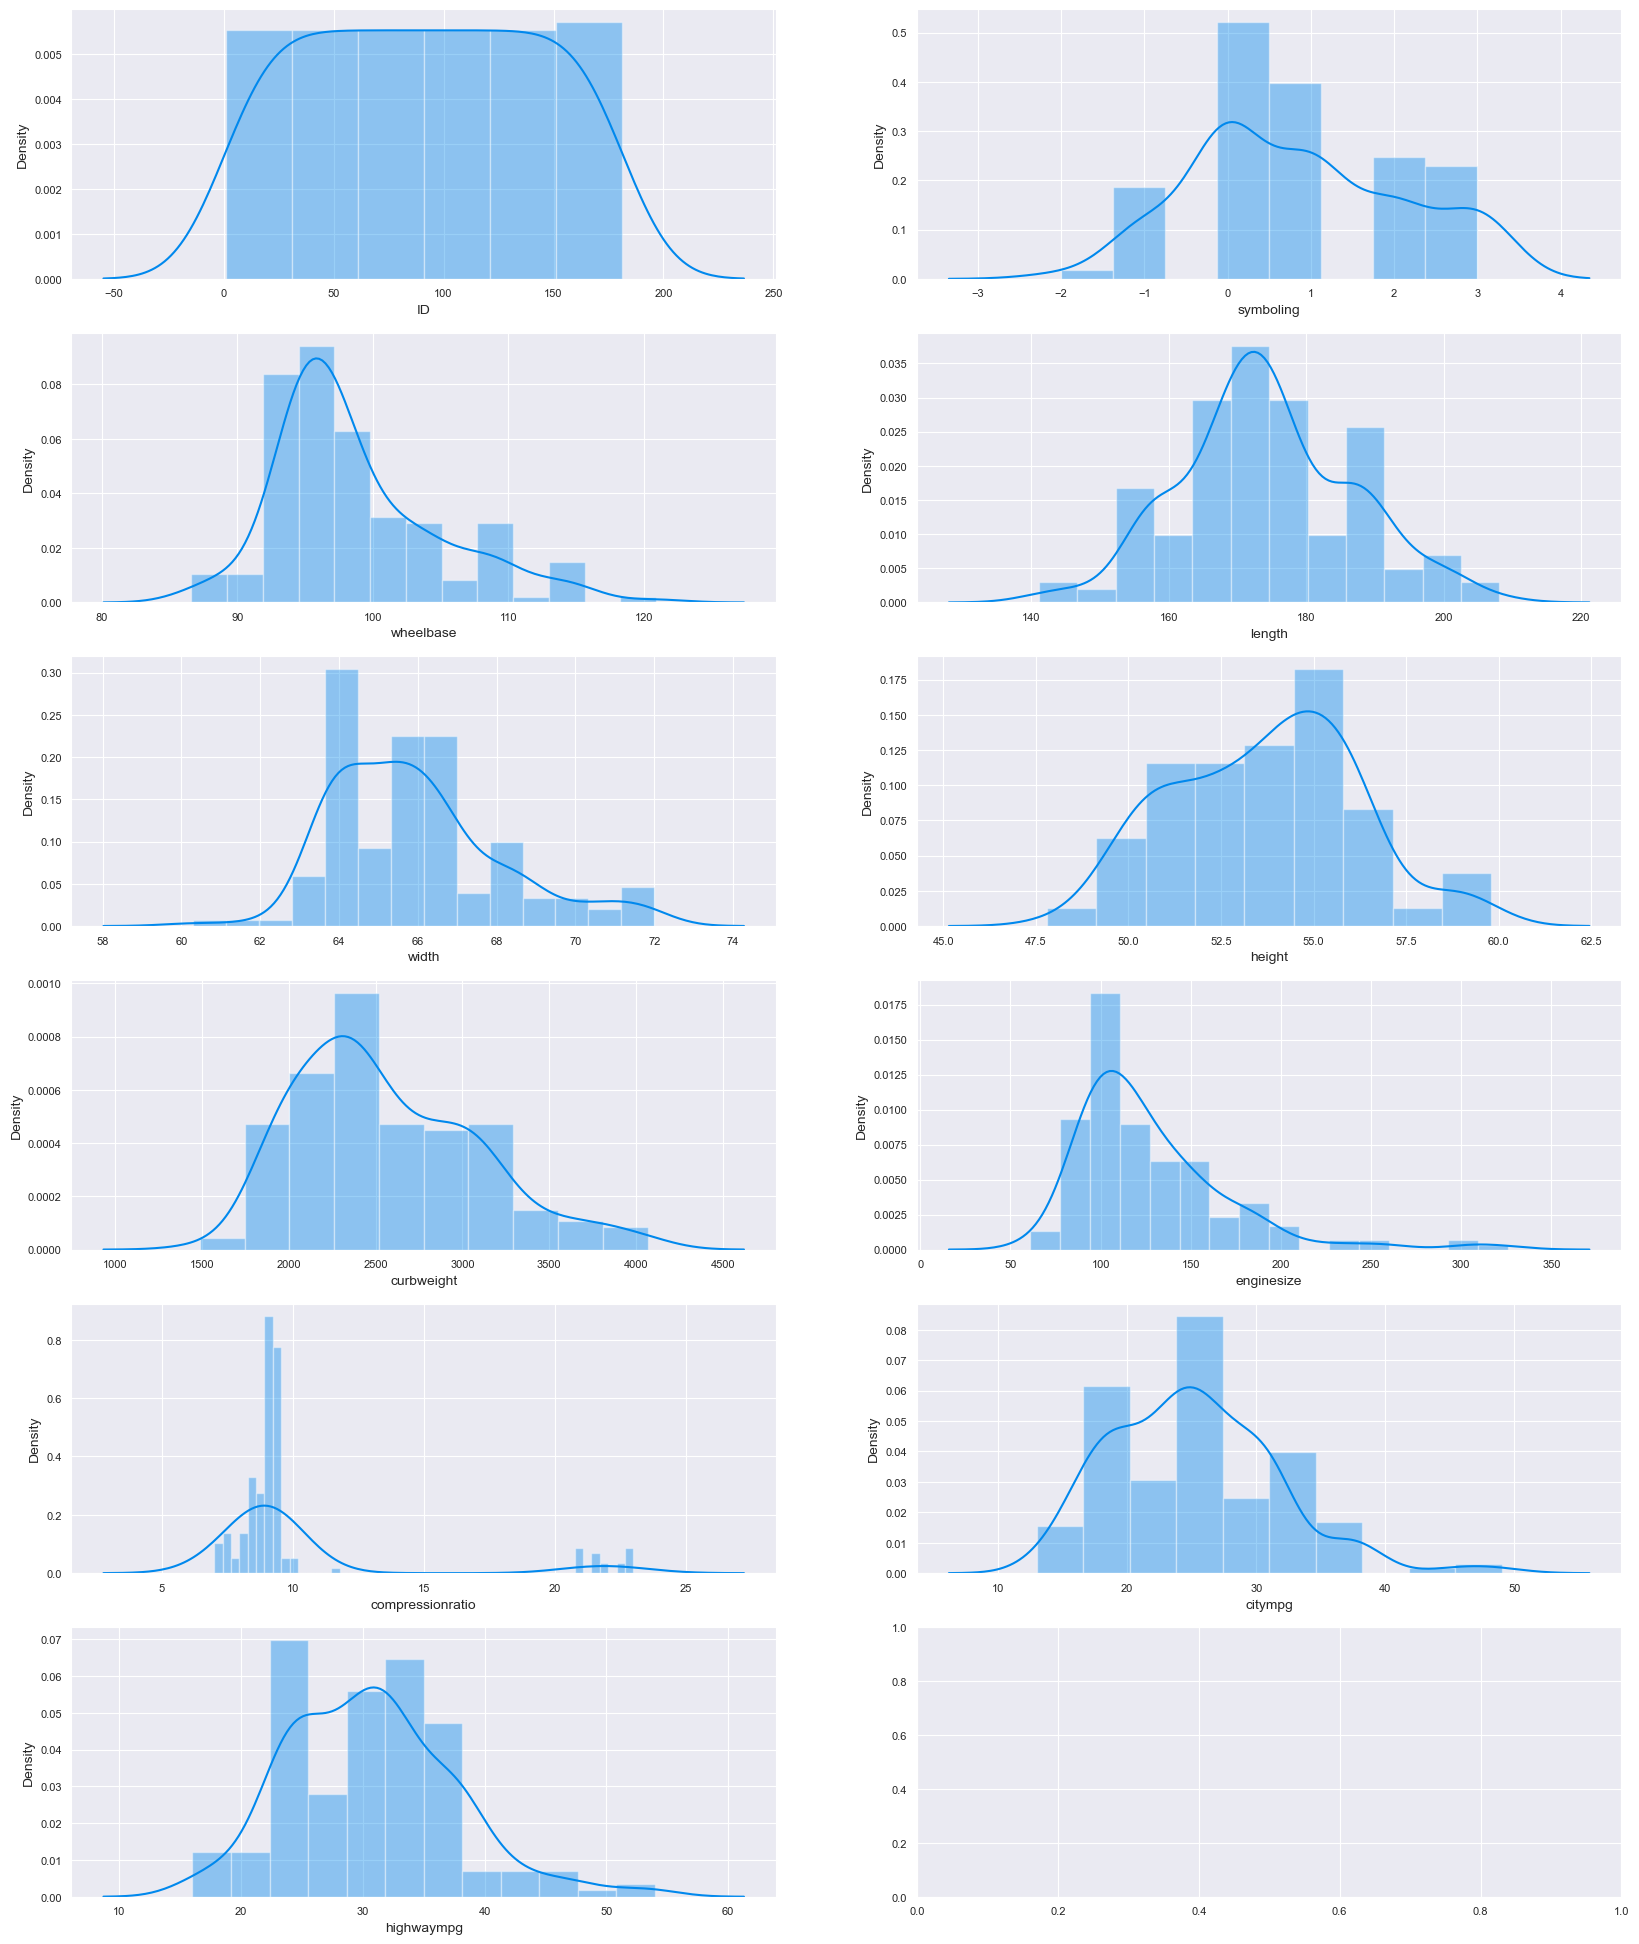

In [23]:
fig, axes = plt.subplots(nrows = 6,ncols = 2, figsize=(20,25))
for ax, col in list (zip(axes.flat,numerical_cols)):
     if col!='price':
        sns.distplot(usedcar_df[col],ax=ax)                         #distance plots for all numerical columns

In [24]:
print(categorical_cols)

['stroke', 'numofcylinders', 'numofdoors', 'normalizedlosses', 'enginelocation', 'bore', 'enginetype', 'make', 'aspiration', 'fueltype', 'bodystyle', 'horsepower', 'peakrpm', 'drivewheels', 'fuelsystem']


There are some outliers in compression-ratio there is no value between 15 to 20 and from 20 to 25 there are some values, which disturbs overall distribution.

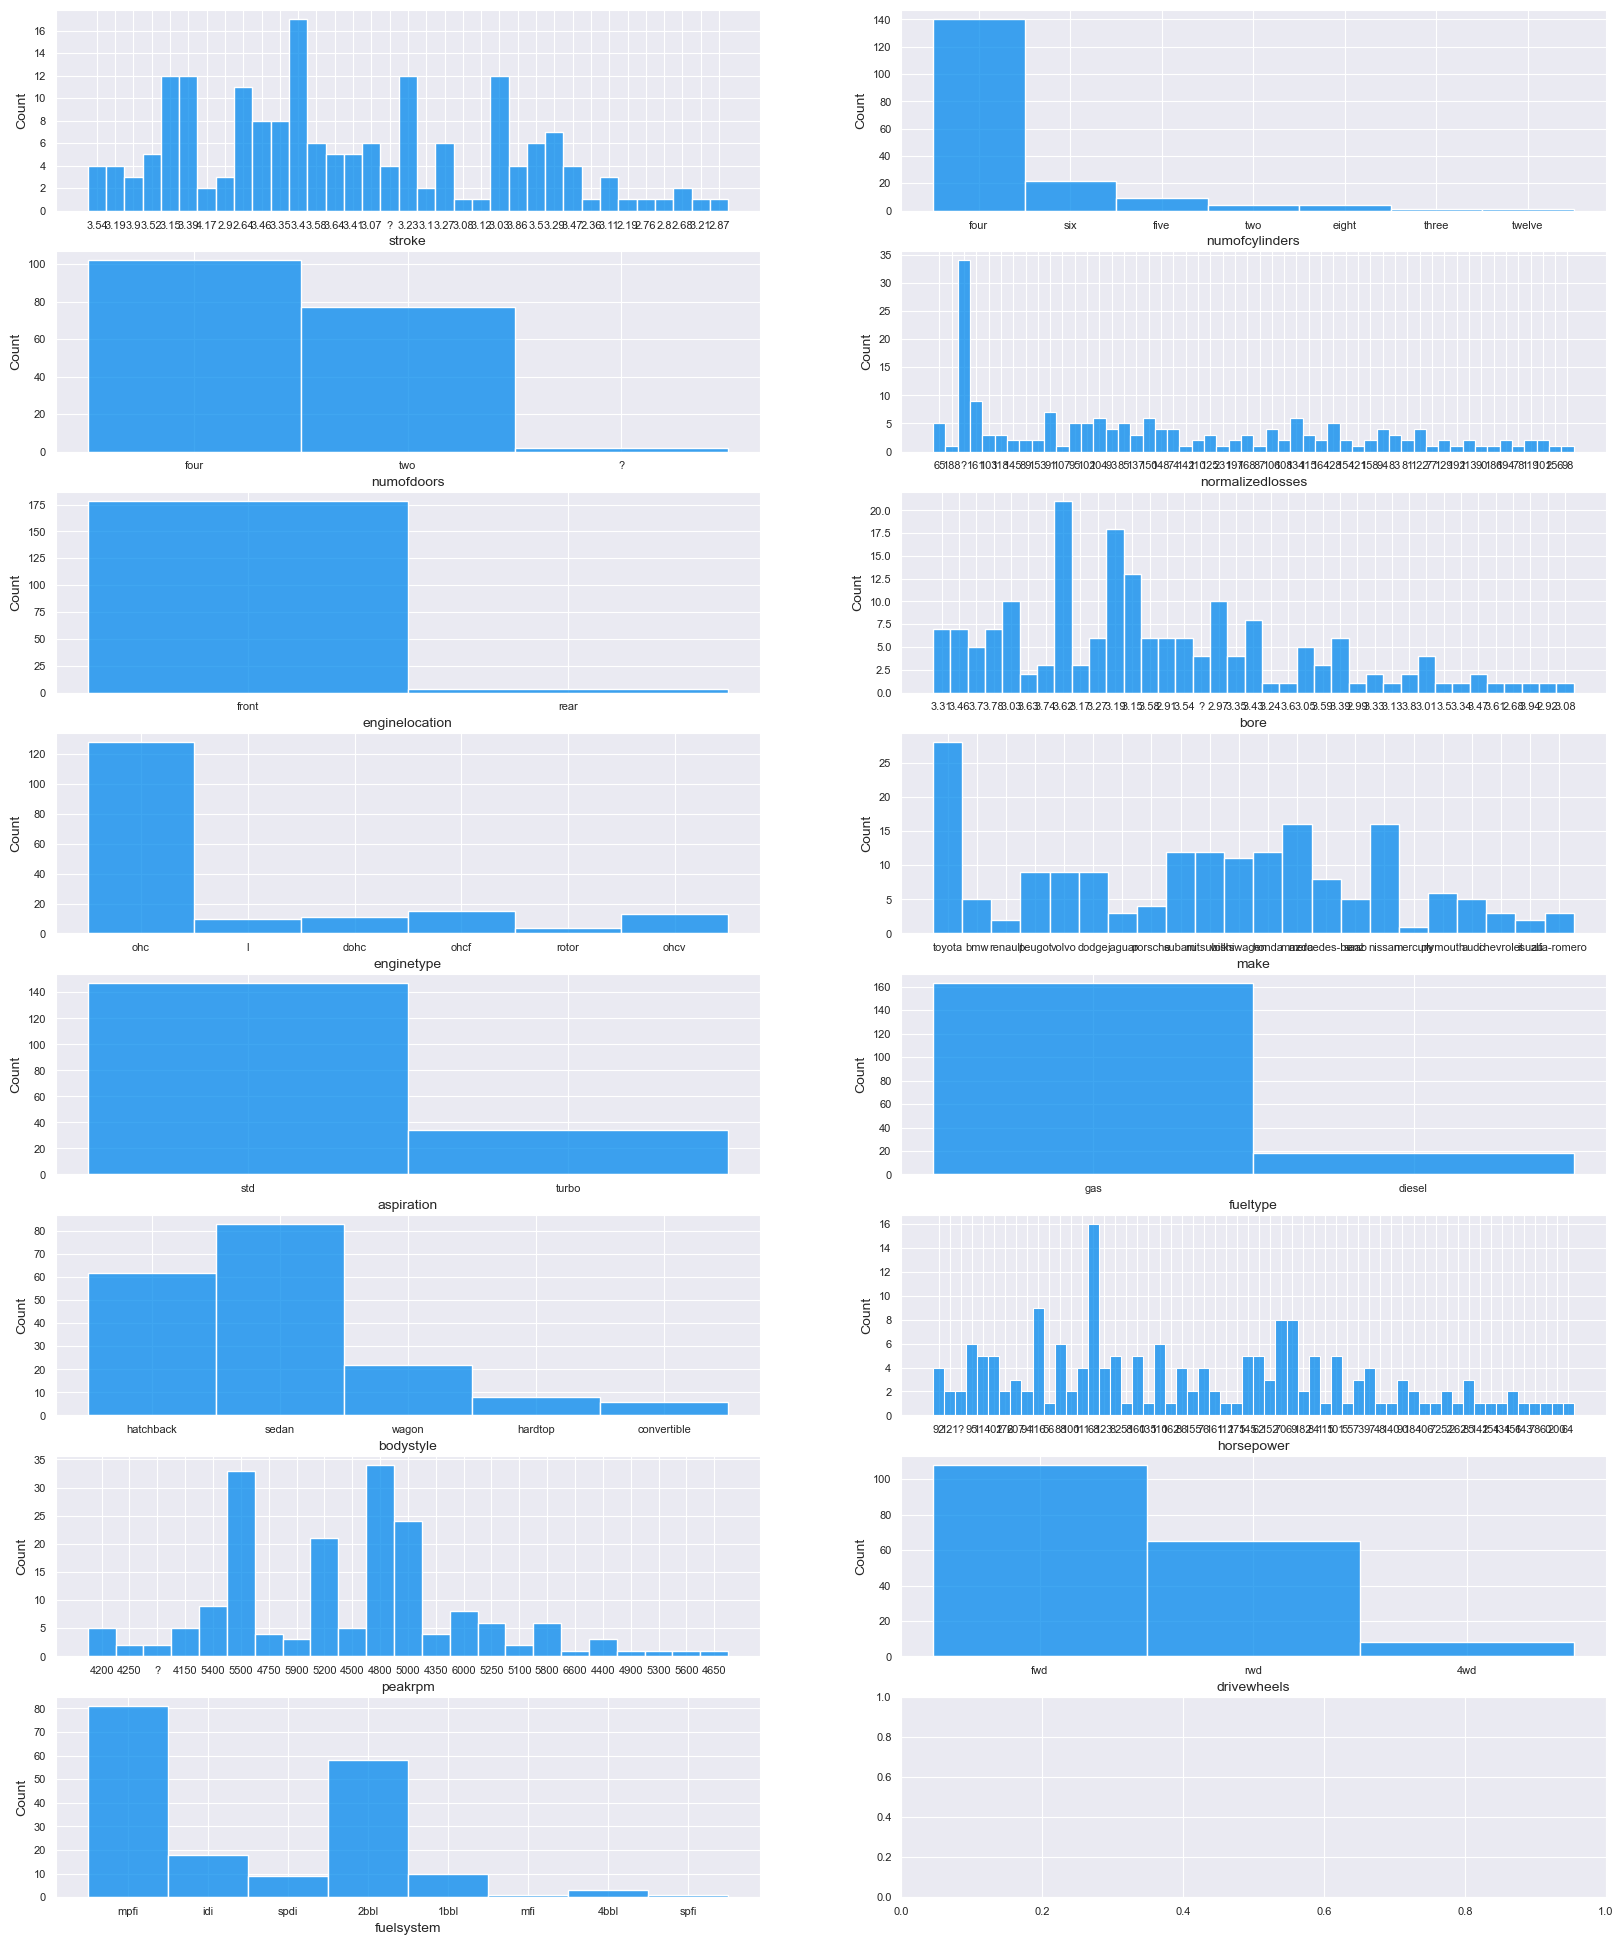

In [25]:
fig, axes = plt.subplots(nrows = 8,ncols = 2, figsize=(20,25))
for ax, col in list (zip(axes.flat,categorical_cols)):
    sns.histplot(usedcar_df[col],ax=ax)                         #graph to show the categorical columns

In engine-location column, we have large number of values present in front and less numbers in rare.

In [26]:
print(usedcar_df.enginelocation.value_counts())
print(usedcar_df[usedcar_df.enginelocation =='front'].price.median())
print(usedcar_df[usedcar_df.enginelocation =='rear'].price.median())

front    178
rear       3
Name: enginelocation, dtype: int64
10221.5
34028.0


Enginelocation placed in rear the value is 3,hence the median price of the cars is 34028 and it is very high compared to front engine located cars.

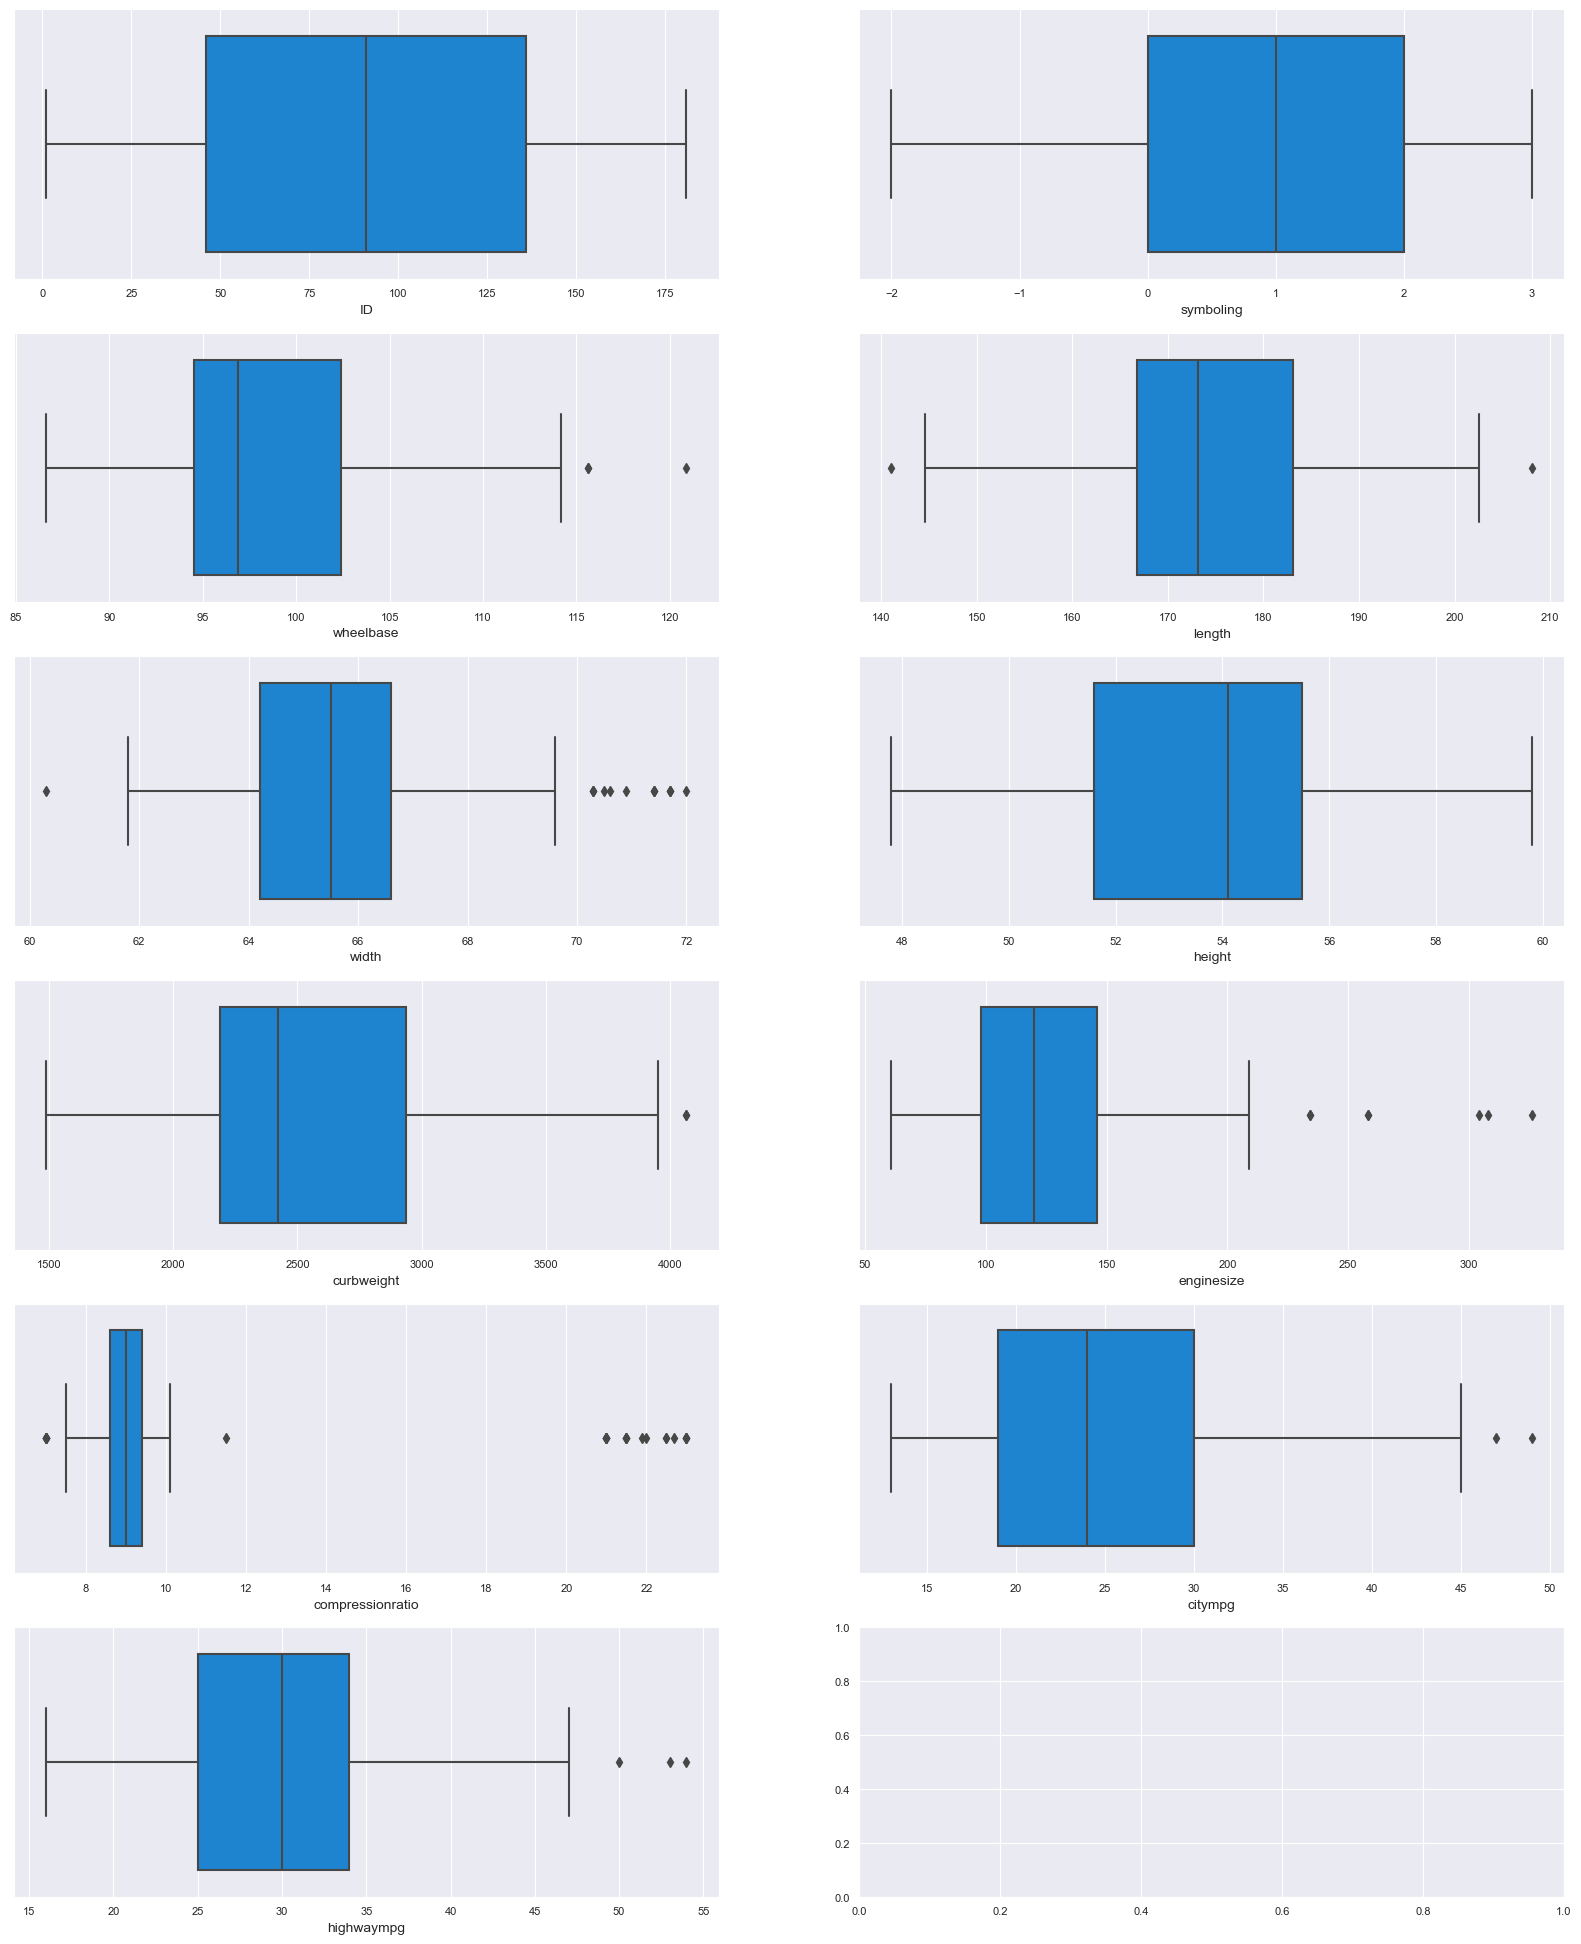

In [27]:
fig, axes = plt.subplots(nrows = 6,ncols = 2, figsize=(20,25))
for ax, col in list (zip(axes.flat,numerical_cols)):
    if col!='price':
        sns.boxplot(usedcar_df[col],ax=ax)                     #to check the outliers present in the numerical columns

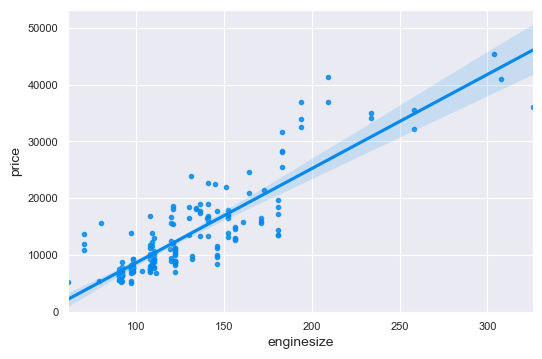

In [28]:
sns.regplot(x="enginesize",y="price",data=usedcar_df)
plt.ylim(0,);                                             #Bivariate Analysis

Here we found that, as enginesize increases price is also increases, this indicates positive linear correlation between these 2 variables.

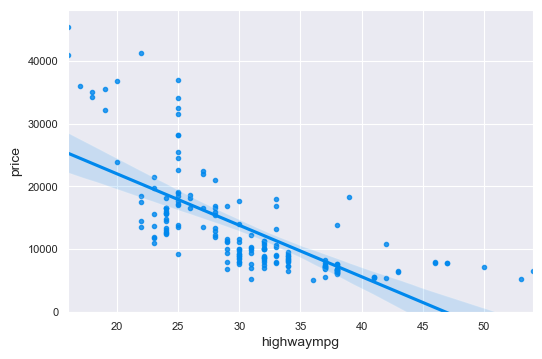

In [29]:
sns.regplot(x="highwaympg",y="price",data=usedcar_df)
plt.ylim(0,);   

Here it is a negetive linear relationship between price and highway miles per gallon.

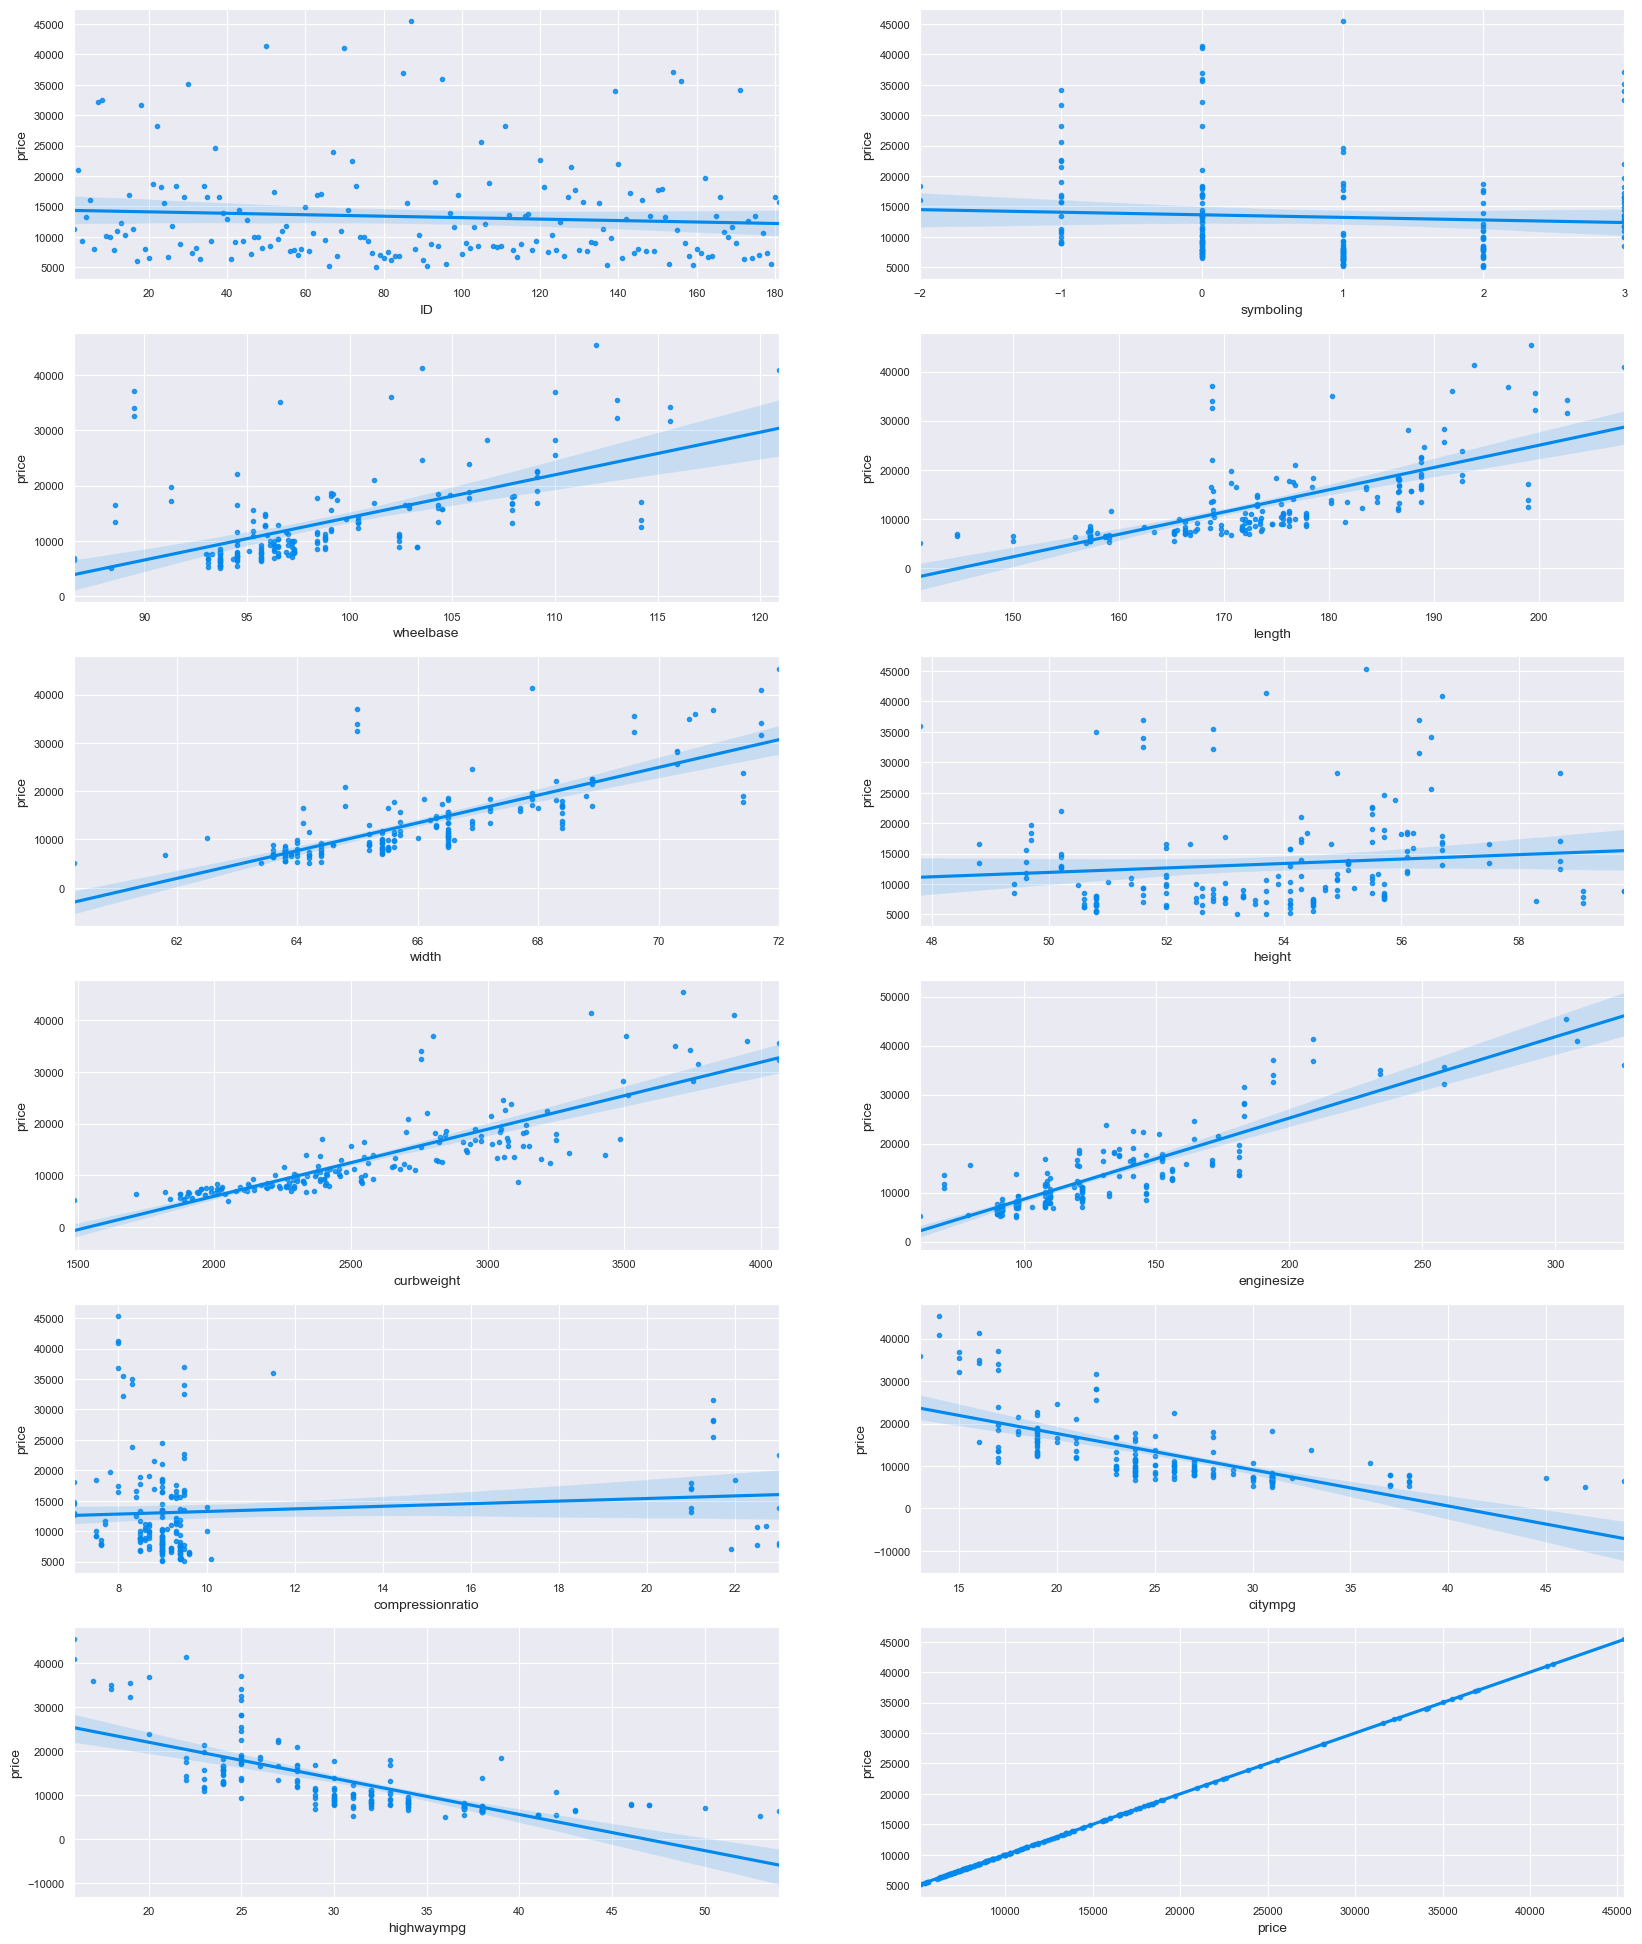

In [30]:
fig, axes = plt.subplots(nrows = 6,ncols = 2, figsize=(20,25))
for ax, col in list (zip(axes.flat,numerical_cols)):
    sns.regplot(col,'price',data=usedcar_df,ax=ax) 

Regression plot for all numerical values.

<AxesSubplot:xlabel='bodystyle', ylabel='price'>

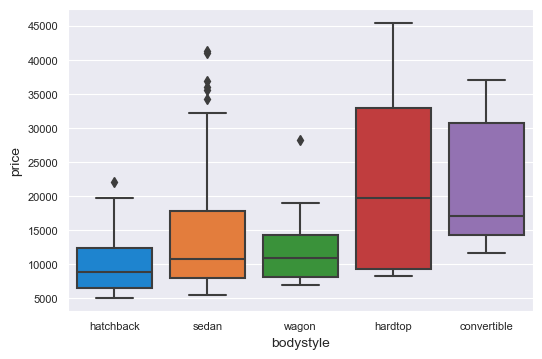

In [31]:
sns.boxplot(x="bodystyle",y="price",data=usedcar_df)

<AxesSubplot:xlabel='make'>

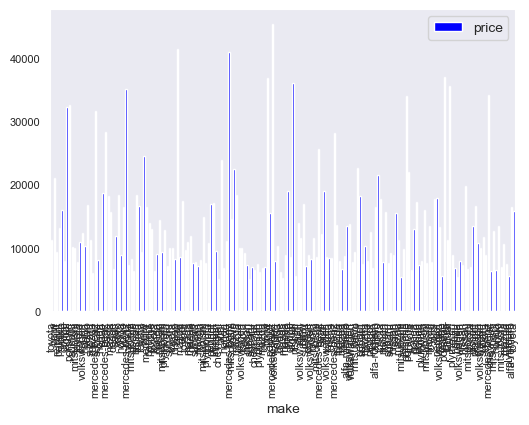

In [32]:
usedcar_df.plot.bar(x='make',y='price', color='blue',grid=False)  

For Categorical column i.e for bodystyle i used boxplot to know about the price list for each bodystyle of a car.

In [34]:
print(usedcar_df.make.value_counts())

toyota           28
nissan           16
mazda            16
subaru           12
honda            12
mitsubishi       12
volkswagen       11
volvo             9
dodge             9
peugot            9
mercedes-benz     8
plymouth          6
audi              5
bmw               5
saab              5
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64


In [35]:
print(usedcar_df.numofcylinders.value_counts())

four      140
six        22
five        9
eight       4
two         4
three       1
twelve      1
Name: numofcylinders, dtype: int64


In [36]:
print(usedcar_df.symboling.value_counts())

 0    59
 1    45
 2    28
 3    26
-1    21
-2     2
Name: symboling, dtype: int64


<AxesSubplot:xlabel='enginelocation', ylabel='price'>

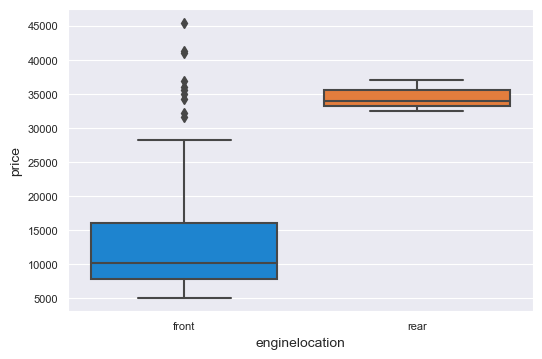

In [37]:
sns.boxplot(x="enginelocation",y="price",data=usedcar_df)

In [38]:
usedcar_df[usedcar_df['symboling']>0]

,ID,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,...,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
5,6,1,118,dodge,gas,turbo,two,hatchback,fwd,front,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,7957
7,8,3,?,porsche,gas,std,two,hardtop,rwd,rear,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528
9,10,3,153,mitsubishi,gas,turbo,two,hatchback,fwd,front,...,110,spdi,3.17,3.46,7.5,116,5500,23,30,9959
13,14,1,107,honda,gas,std,two,sedan,fwd,front,...,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345
16,17,1,104,mazda,gas,std,two,hatchback,fwd,front,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1,125,mitsubishi,gas,std,four,sedan,fwd,front,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,6989
176,177,1,129,mazda,gas,std,two,hatchback,fwd,front,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595
177,178,1,113,mazda,gas,std,four,sedan,fwd,front,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
178,179,1,119,plymouth,gas,std,two,hatchback,fwd,front,...,90,2bbl,2.97,3.23,9.4,68,5500,37,41,5572


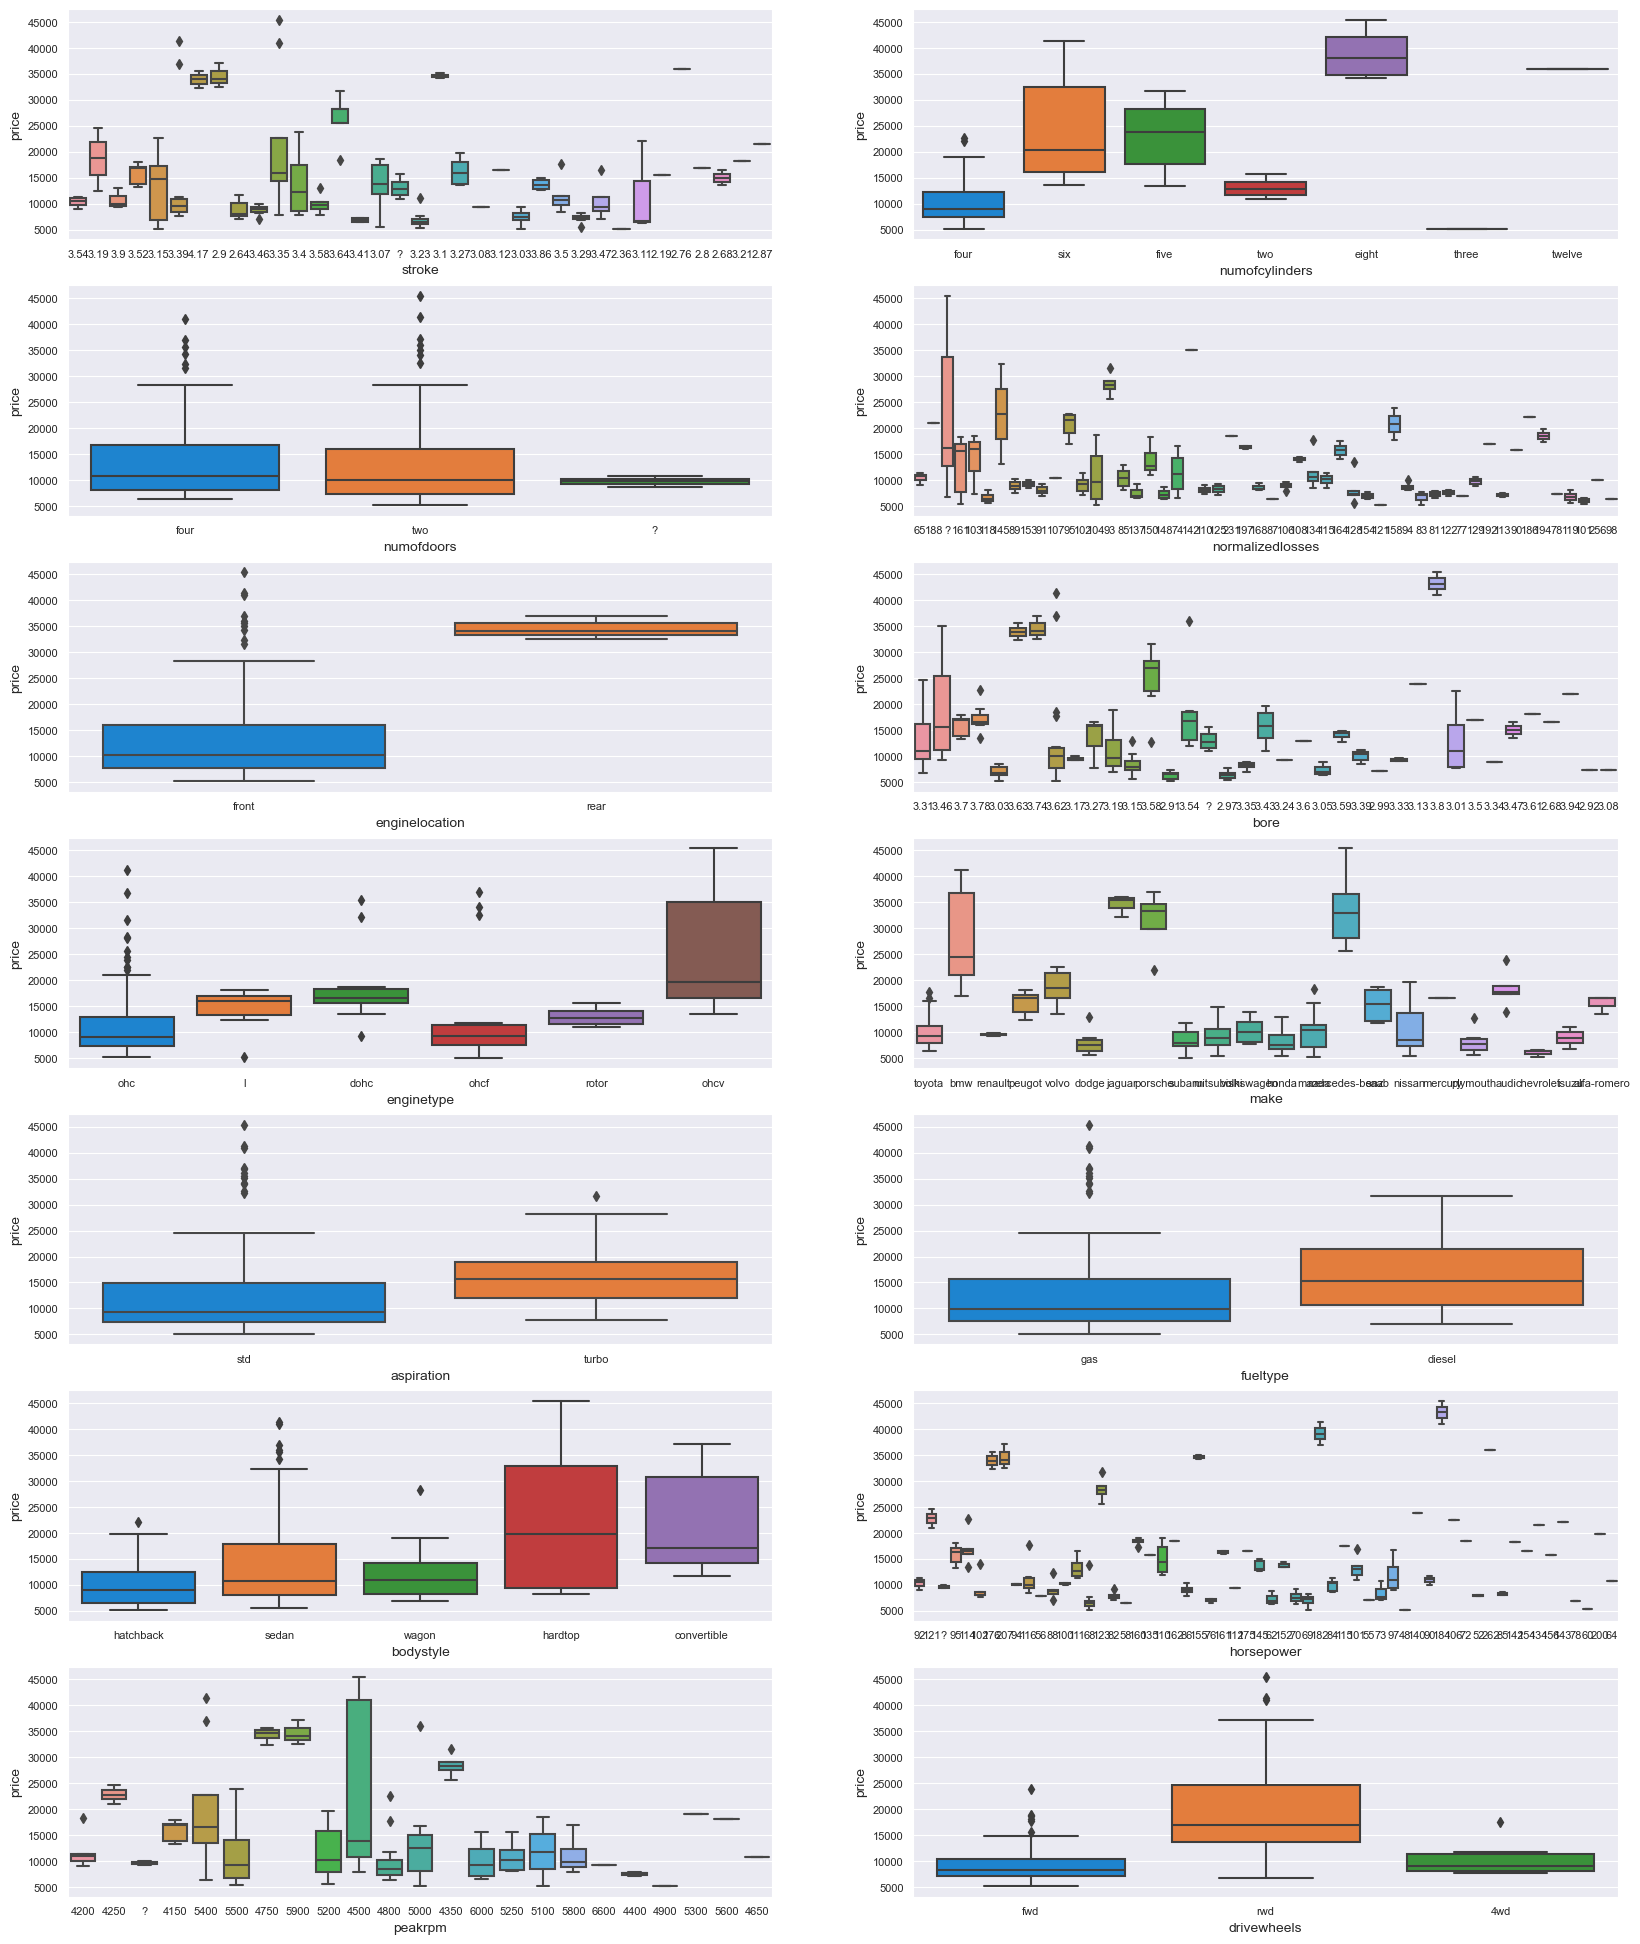

In [39]:
fig, axes = plt.subplots(nrows = 7,ncols = 2, figsize=(20,25))
for ax, col in list (zip(axes.flat,categorical_cols)):
    sns.boxplot(col,'price',data=usedcar_df,ax=ax) 

Important Categorical features:
EngineLocation,
Bodystyle,
Fueltype,
numofcylinders,
drivewheels.

In [128]:
df_cleaned = usedcar_df.copy(deep=True)       #Data Cleaning

In [130]:
df_cleaned.drop(['make'],axis=True)
df_cleaned.drop(df_cleaned[df_cleaned['compressionratio']>12].index,inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['peakrpm']>6000].index,inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['citympg']>45].index,inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['highwaympg']>45].index,inplace=True)

TypeError: '>' not supported between instances of 'str' and 'int'

In [131]:
df_cleaned.shape

(163, 27)

In [132]:
df_cleaned.columns

Index(['ID', 'symboling', 'normalizedlosses', 'make', 'fueltype', 'aspiration',
       'numofdoors', 'bodystyle', 'drivewheels', 'enginelocation', 'wheelbase',
       'length', 'width', 'height', 'curbweight', 'enginetype',
       'numofcylinders', 'enginesize', 'fuelsystem', 'bore', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [133]:
print(numerical_cols)

['ID', 'symboling', 'wheelbase', 'length', 'width', 'height', 'curbweight', 'enginesize', 'compressionratio', 'citympg', 'highwaympg', 'price']


In [134]:
print(categorical_cols)

['stroke', 'numofcylinders', 'numofdoors', 'normalizedlosses', 'enginelocation', 'bore', 'enginetype', 'make', 'aspiration', 'fueltype', 'bodystyle', 'horsepower', 'peakrpm', 'drivewheels', 'fuelsystem']


Important Numerical Features: wheelbase, length, width, height, curbweight, enginesize, compressionratio, citympg, highwaympg.

Data Preparation

In [135]:
categorical_cols_new = ['enginelocation','bodystyle','fueltype','numofcylinders', 'drivewheels']
numerical_cols_new = ['wheelbase','length','width','height','curbweight','enginesize','compressionratio','citympg','highwaympg','price']

In [136]:
df_final = df_cleaned[['wheelbase','length','width','height','curbweight','enginesize','compressionratio','citympg','highwaympg','enginelocation','price','bodystyle','fueltype','numofcylinders', 'drivewheels']]
#Final features

In [137]:
df_final.head()

,wheelbase,length,width,height,curbweight,enginesize,compressionratio,citympg,highwaympg,enginelocation,price,bodystyle,fueltype,numofcylinders,drivewheels
0,102.4,175.6,66.5,53.9,2458,122,8.7,27,32,front,11248,hatchback,gas,four,fwd
1,101.2,176.8,64.8,54.3,2710,164,9.0,21,28,front,20970,sedan,gas,six,rwd
2,96.1,181.5,66.5,55.2,2579,132,8.7,23,31,front,9295,wagon,gas,four,fwd
4,104.3,188.8,67.2,56.2,2935,141,9.5,24,28,front,15985,sedan,gas,four,rwd
5,93.7,157.3,63.8,50.8,2128,98,7.6,24,30,front,7957,hatchback,gas,four,fwd


In [138]:
df_final = pd.get_dummies(df_final, drop_first=False)         #one hot Encoding
df_final.head()

,wheelbase,length,width,height,curbweight,enginesize,compressionratio,citympg,highwaympg,price,...,numofcylinders_eight,numofcylinders_five,numofcylinders_four,numofcylinders_six,numofcylinders_three,numofcylinders_twelve,numofcylinders_two,drivewheels_4wd,drivewheels_fwd,drivewheels_rwd
0,102.4,175.6,66.5,53.9,2458,122,8.7,27,32,11248,...,0,0,1,0,0,0,0,0,1,0
1,101.2,176.8,64.8,54.3,2710,164,9.0,21,28,20970,...,0,0,0,1,0,0,0,0,0,1
2,96.1,181.5,66.5,55.2,2579,132,8.7,23,31,9295,...,0,0,1,0,0,0,0,0,1,0
4,104.3,188.8,67.2,56.2,2935,141,9.5,24,28,15985,...,0,0,1,0,0,0,0,0,0,1
5,93.7,157.3,63.8,50.8,2128,98,7.6,24,30,7957,...,0,0,1,0,0,0,0,0,1,0


In [54]:
X = usedcar_df[['enginesize']]
Y = usedcar_df[['price']]                 #variables assigned to X and Y

In [55]:
print(Y)

     price
0    11248
1    20970
2     9295
3    13200
4    15985
..     ...
176  10595
177   7395
178   5572
179  16500
180  15750

[181 rows x 1 columns]


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2) #splitted to train and test

Model Training:
Linear Regression

In [144]:
lin_reg_model = LinearRegression()

In [145]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [59]:
training_data_prediction = lin_reg_model.predict(X_train)

In [149]:
mse = mean_squared_error(Y_train,training_data_prediction)
rmse = math.sqrt(mse)
print("Root Mean Square Error:",rmse)

Root Mean Square Error: 3865.600975143351


Visualize Actual and predicted price

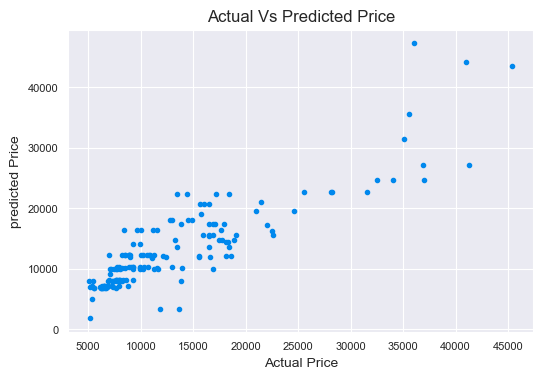

In [61]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual Vs Predicted Price")
plt.show()

In [62]:
X_test.head()

,enginesize
64,120
45,98
12,109
164,181
157,111


Here we visualized the actual price and predicted price performed by our model, it performed well. Most of the cars price in actual price(x-label)from 5000 to 20000 is predicted properly.

In [63]:
testing_data_prediction = lin_reg_model.predict(X_test)

In [64]:
testing_data_prediction

array([[11930.90213943],
       [ 8158.4120906 ],
       [10044.65711502],
       [22390.9881839 ],
       [10387.61075582],
       [35594.70335479],
       [17418.16039227],
       [12273.85578023],
       [13817.14716384],
       [18104.06767387],
       [ 3357.06111937],
       [ 5071.82932338],
       [15531.91536785],
       [12102.37895983],
       [10044.65711502],
       [ 8158.4120906 ],
       [10216.13393542],
       [22390.9881839 ],
       [31479.25966516]])

In [65]:
mse = mean_squared_error(Y_test,testing_data_prediction)
rmse = math.sqrt(mse)
print("Root Mean Square Error:",rmse)

Root Mean Square Error: 4914.713956742253


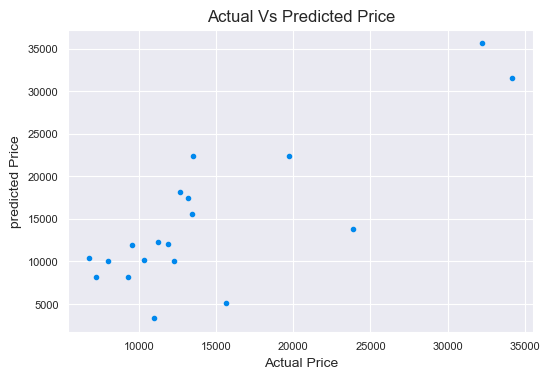

In [66]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual Vs Predicted Price")
plt.show()

In [67]:
usedcar_df_test = pd.read_csv('C:/D drive/sharan personal/INSAID GCD PROGRAMME/Data Science Projects/Machine Learning Projects/Used car prediction/TestData.csv')

In [68]:
usedcar_df_test.shape

(20, 26)

In [69]:
usedcar_df_test.head()

,ID,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,...,numofcylinders,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,-2,103,volvo,gas,std,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
1,2,0,188,bmw,gas,std,four,sedan,rwd,front,...,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28
2,3,-1,74,volvo,gas,turbo,four,wagon,rwd,front,...,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22
3,4,1,154,plymouth,gas,std,four,sedan,fwd,front,...,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38
4,5,1,103,nissan,gas,std,four,wagon,fwd,front,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37


In [72]:
usedcar_df_test.describe()

,ID,symboling,wheelbase,length,width,height,curbweight,enginesize,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,0.750000,99.410000,174.445000,65.395000,54.280000,2478.750000,117.600000,3.257500,3.10150,10.255000,96.500000,5215.000000,25.600000,31.050000
std,5.91608,1.164158,5.705021,12.505808,1.602129,1.913278,462.285384,29.904057,0.313702,0.36582,4.311487,33.708503,544.856331,6.620542,6.261621
min,1.00000,-2.000000,93.700000,150.000000,63.600000,50.800000,1918.000000,90.000000,2.540000,2.07000,7.500000,56.000000,4250.000000,16.000000,22.000000
25%,5.75000,0.000000,94.500000,167.050000,64.000000,52.900000,2025.000000,97.000000,3.040000,3.06750,8.475000,68.750000,4950.000000,19.000000,26.500000
50%,10.50000,1.000000,98.200000,173.350000,64.800000,54.350000,2357.000000,109.000000,3.215000,3.19000,9.100000,96.000000,5200.000000,24.500000,29.000000
75%,15.25000,1.250000,103.700000,186.625000,66.600000,55.800000,2801.750000,131.500000,3.470000,3.30500,9.400000,112.500000,5500.000000,31.000000,37.000000
max,20.00000,3.000000,114.200000,198.900000,68.400000,57.500000,3285.000000,209.000000,3.780000,3.41000,23.000000,182.000000,6600.000000,37.000000,42.000000


In [73]:
usedcar_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                20 non-null     int64  
 1   symboling         20 non-null     int64  
 2   normalizedlosses  20 non-null     object 
 3   make              20 non-null     object 
 4   fueltype          20 non-null     object 
 5   aspiration        20 non-null     object 
 6   numofdoors        20 non-null     object 
 7   bodystyle         20 non-null     object 
 8   drivewheels       20 non-null     object 
 9   enginelocation    20 non-null     object 
 10  wheelbase         20 non-null     float64
 11  length            20 non-null     float64
 12  width             20 non-null     float64
 13  height            20 non-null     float64
 14  curbweight        20 non-null     int64  
 15  enginetype        20 non-null     object 
 16  numofcylinders    20 non-null     object 
 17 

In [74]:
usedcar_df_test.isna().sum()   

ID                  0
symboling           0
normalizedlosses    0
make                0
fueltype            0
aspiration          0
numofdoors          0
bodystyle           0
drivewheels         0
enginelocation      0
wheelbase           0
length              0
width               0
height              0
curbweight          0
enginetype          0
numofcylinders      0
enginesize          0
fuelsystem          0
bore                0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [76]:
sns.set_style('darkgrid') 

<AxesSubplot:xlabel='curbweight', ylabel='Density'>

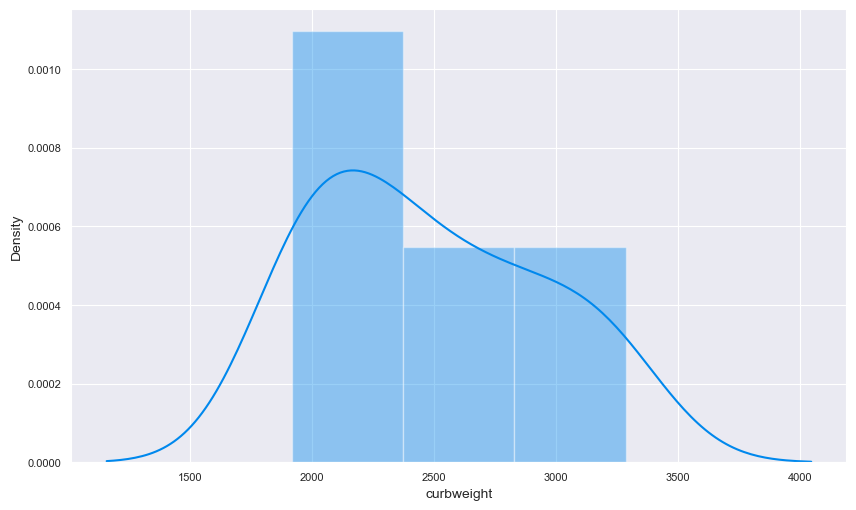

In [77]:
plt.figure(figsize=(10,6))
sns.distplot(usedcar_df_test.curbweight)

In [78]:
all_cols_test = usedcar_df_test.columns
numerical_cols_test = usedcar_df_test._get_numeric_data().columns.to_list()
categorical_cols_test = list(set(all_cols_test)-set(numerical_cols_test))     #seperating numerival and categorical values in test data

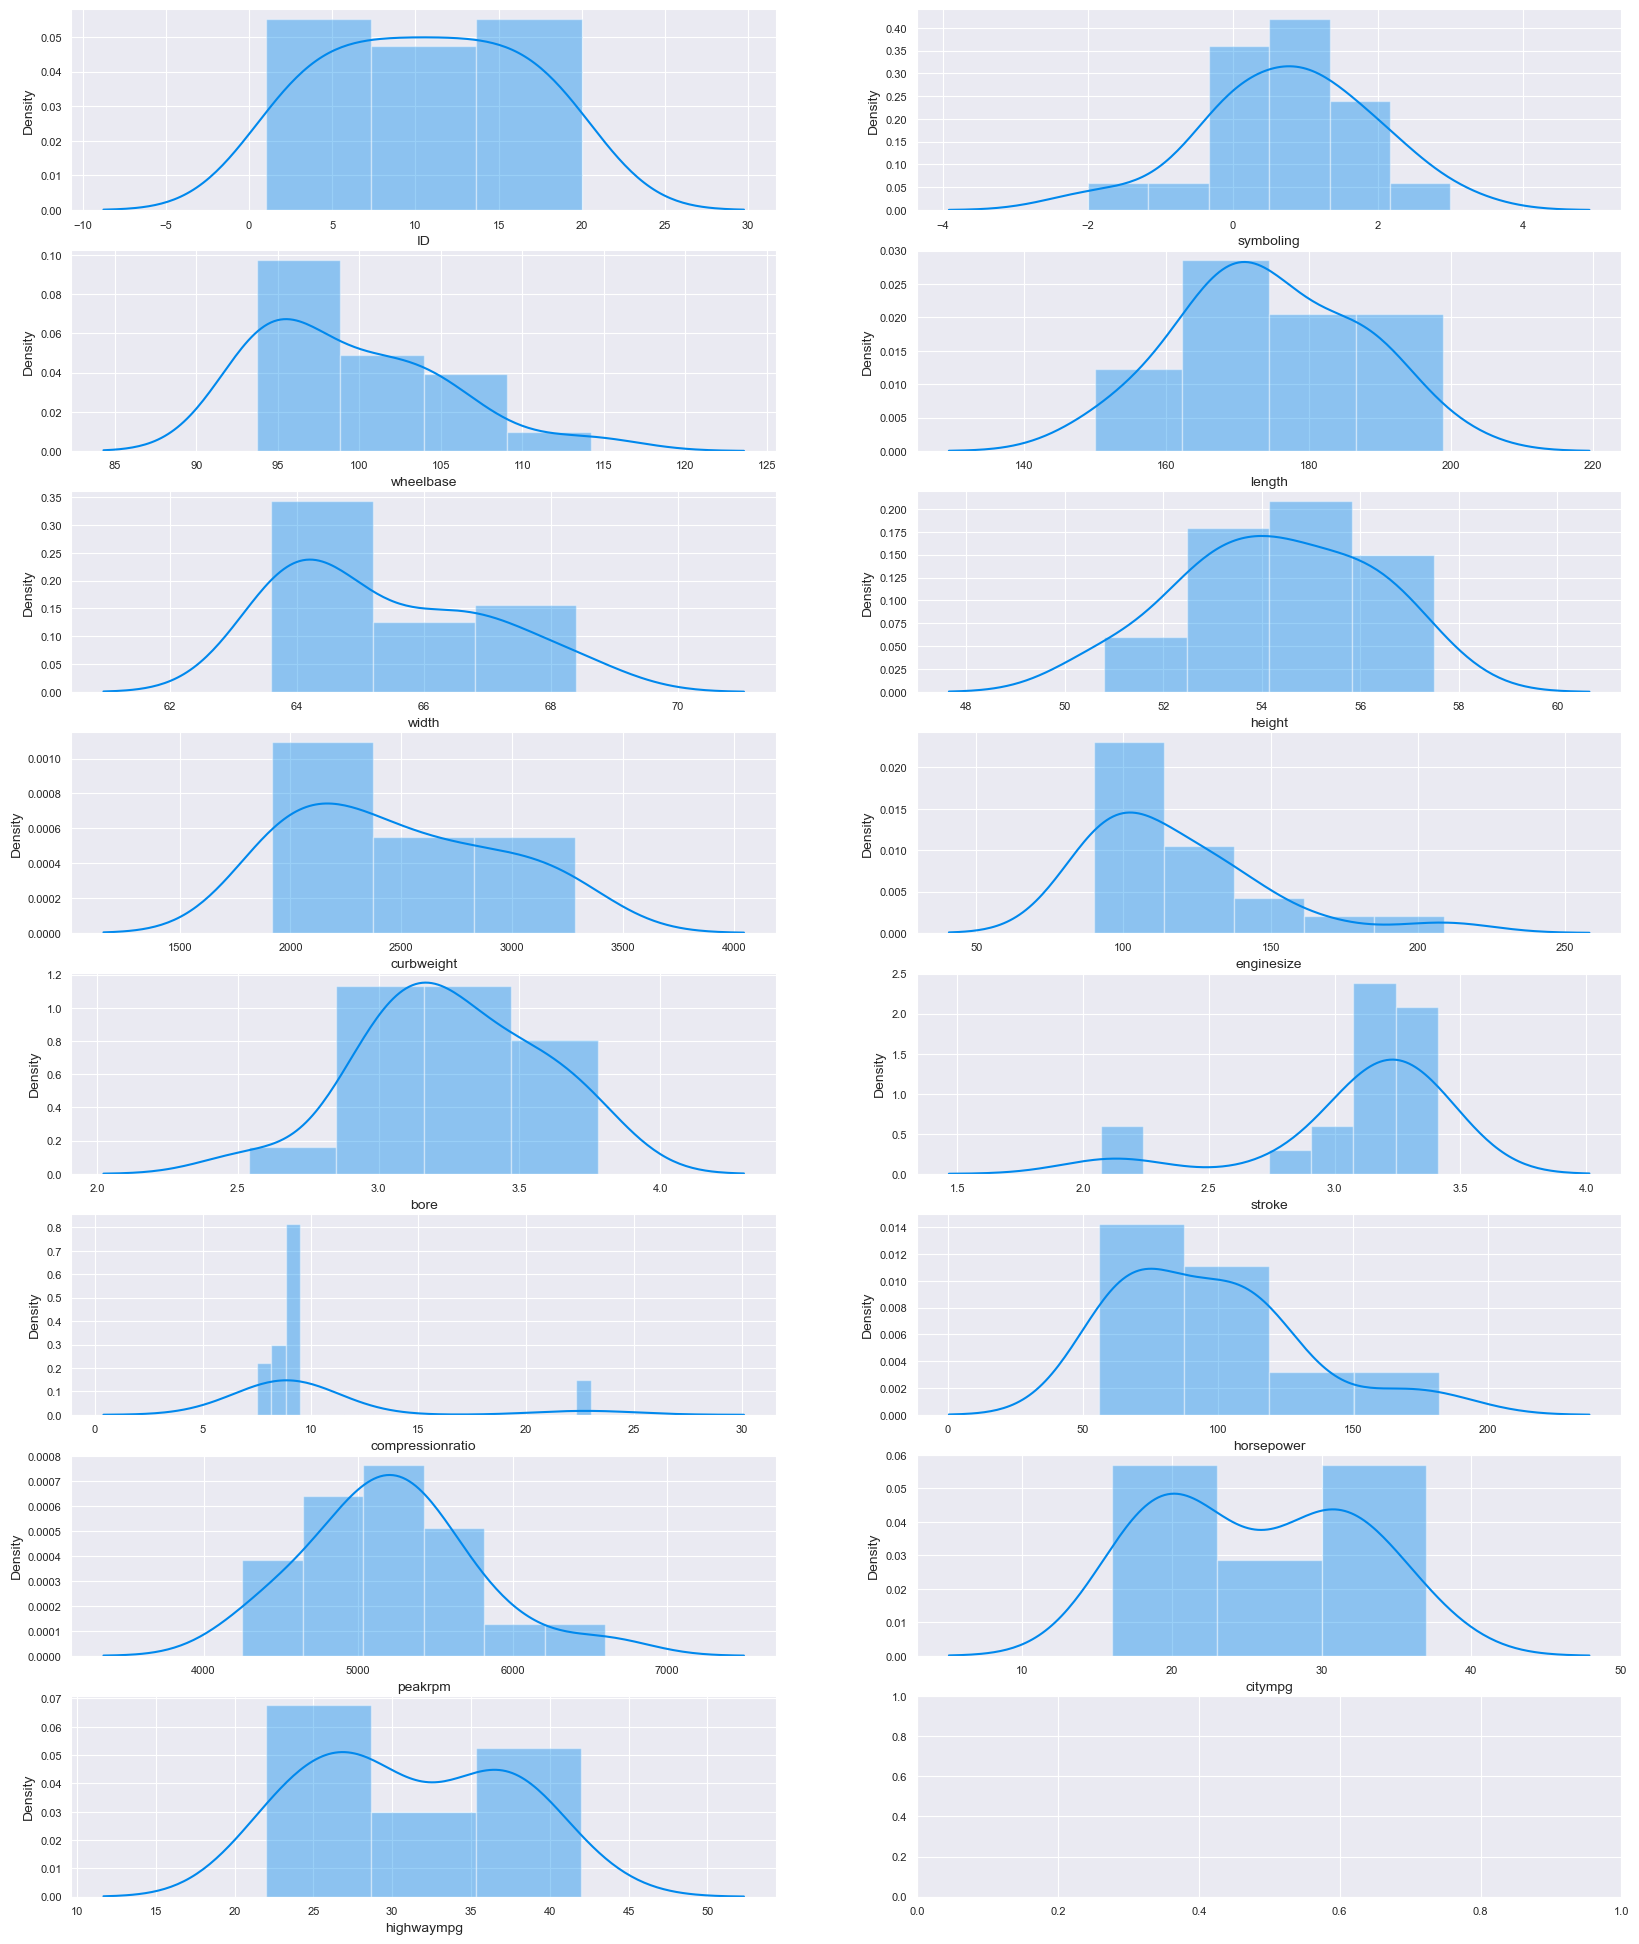

In [96]:
fig, axes = plt.subplots(nrows = 8,ncols = 2, figsize=(20,25))
for ax, col in list (zip(axes.flat,numerical_cols_test)):
        sns.distplot(usedcar_df_test[col],ax=ax)

In [80]:
print(categorical_cols_test)

['numofcylinders', 'numofdoors', 'normalizedlosses', 'enginelocation', 'enginetype', 'make', 'aspiration', 'fueltype', 'bodystyle', 'drivewheels', 'fuelsystem']


In [81]:
print(numerical_cols_test)

['ID', 'symboling', 'wheelbase', 'length', 'width', 'height', 'curbweight', 'enginesize', 'bore', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


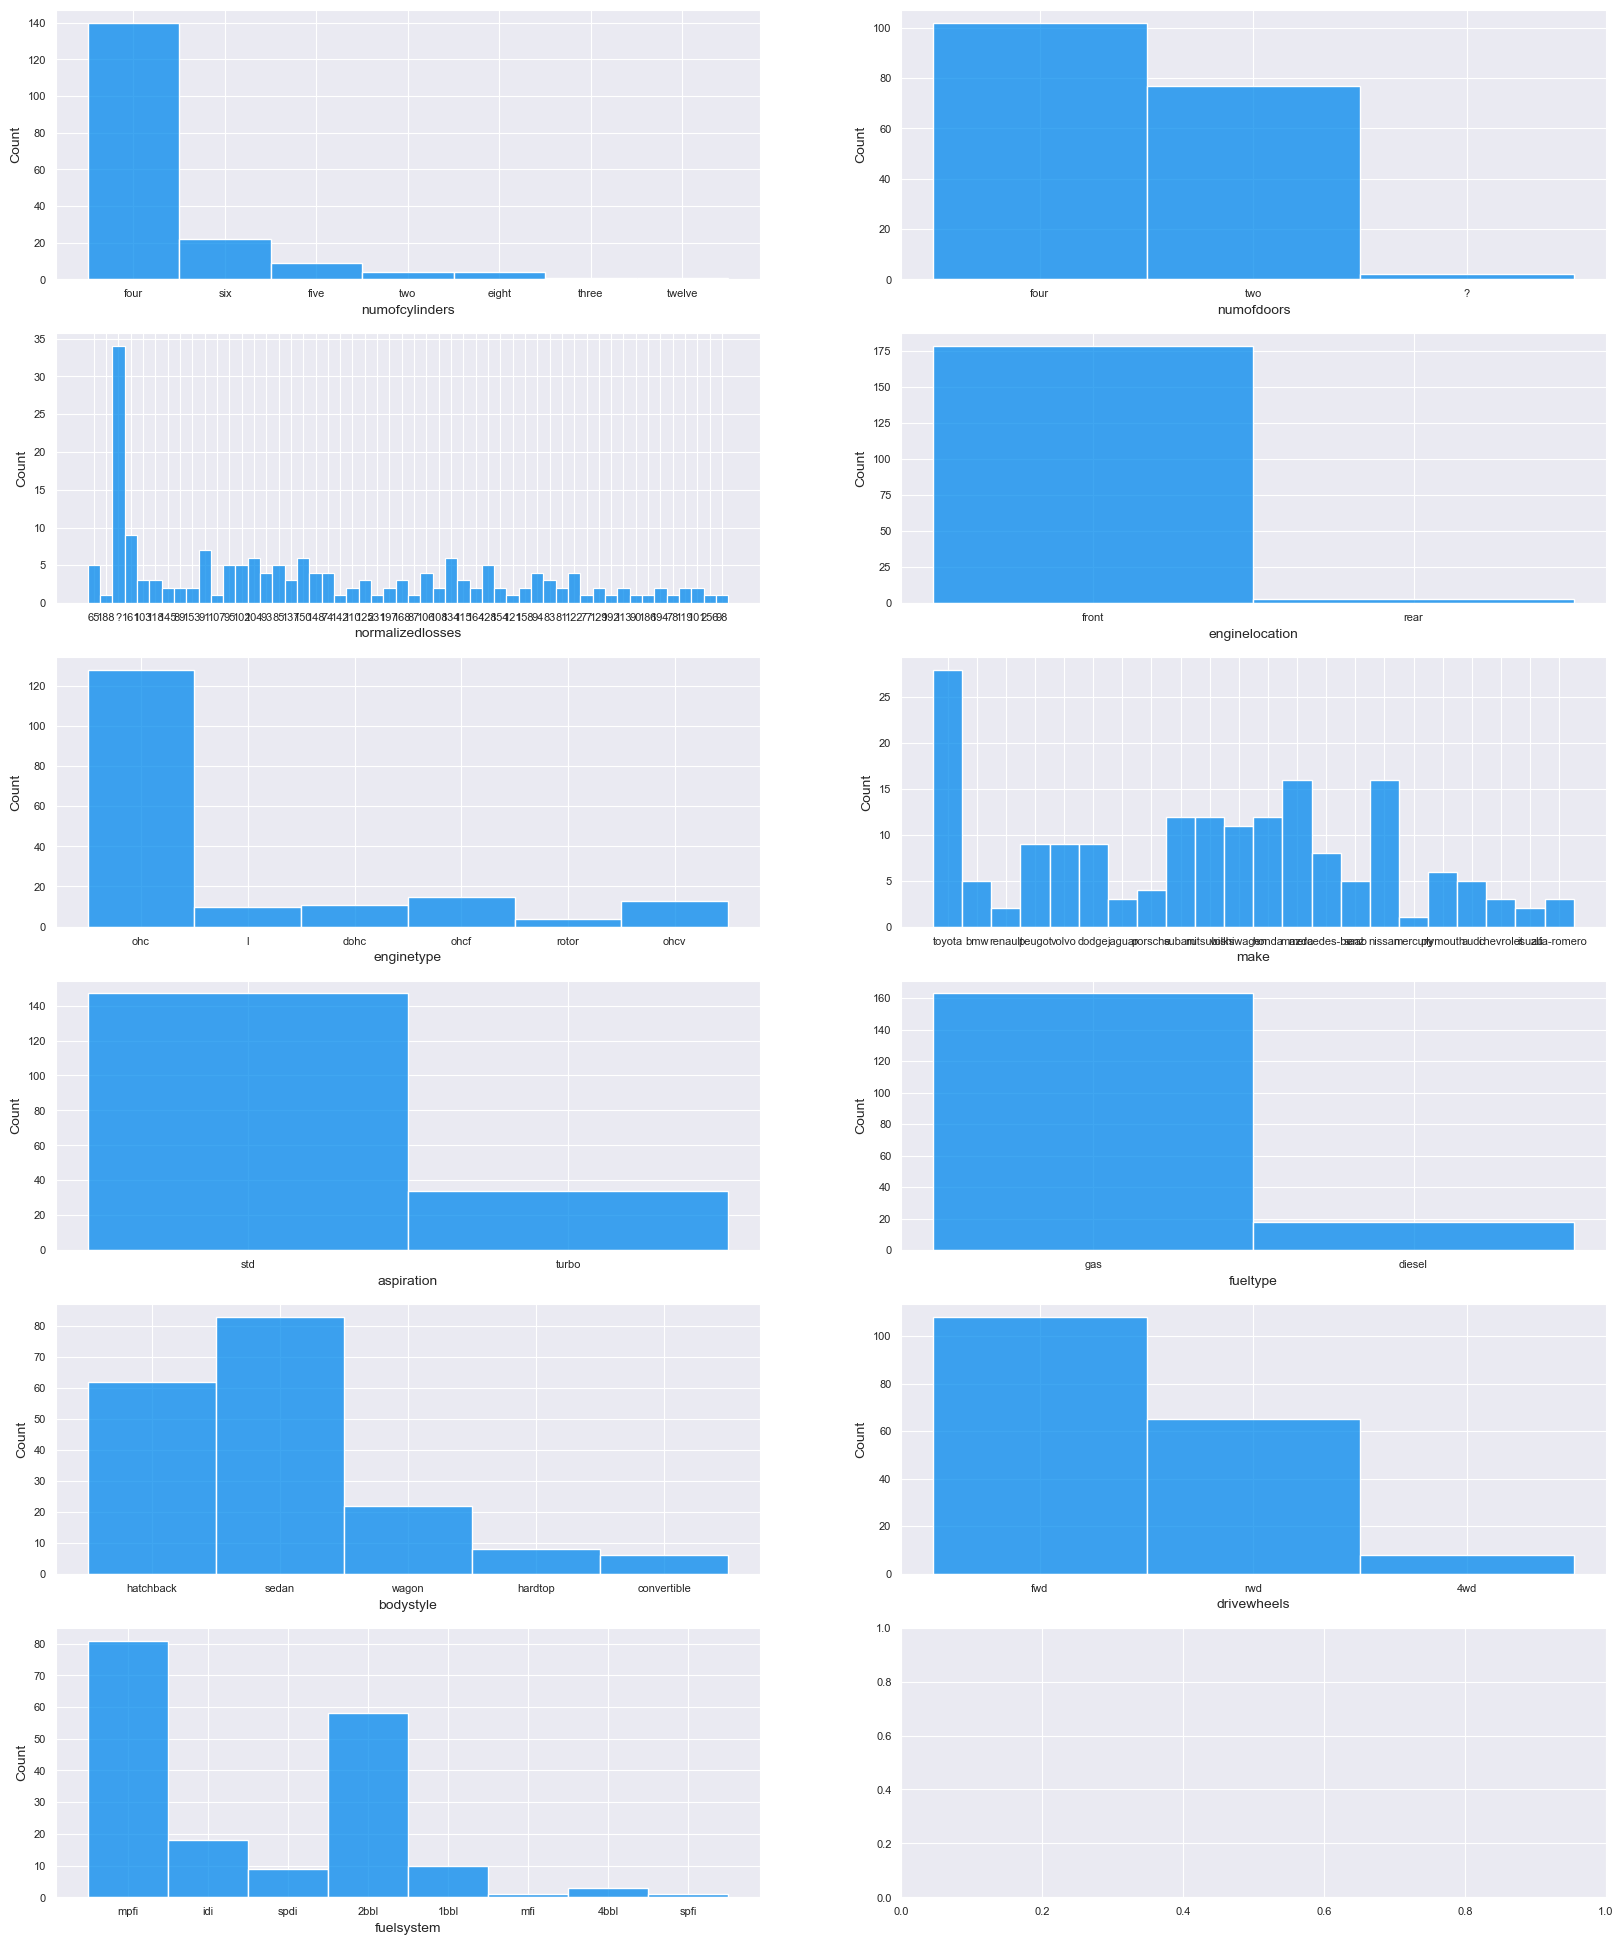

In [83]:
fig, axes = plt.subplots(nrows = 6,ncols = 2, figsize=(20,25))
for ax, col in list (zip(axes.flat,categorical_cols_test)):
    sns.histplot(usedcar_df[col],ax=ax) 

In [87]:
print(usedcar_df_test.enginelocation.value_counts())
print(usedcar_df_test[usedcar_df_test.enginelocation =='front'].median())
print(usedcar_df_test[usedcar_df_test.enginelocation =='rear'].median())

front    20
Name: enginelocation, dtype: int64
ID                    10.500
symboling              1.000
wheelbase             98.200
length               173.350
width                 64.800
height                54.350
curbweight          2357.000
enginesize           109.000
bore                   3.215
stroke                 3.190
compressionratio       9.100
horsepower            96.000
peakrpm             5200.000
citympg               24.500
highwaympg            29.000
dtype: float64
ID                 NaN
symboling          NaN
normalizedlosses   NaN
make               NaN
fueltype           NaN
aspiration         NaN
numofdoors         NaN
bodystyle          NaN
drivewheels        NaN
enginelocation     NaN
wheelbase          NaN
length             NaN
width              NaN
height             NaN
curbweight         NaN
enginetype         NaN
numofcylinders     NaN
enginesize         NaN
fuelsystem         NaN
bore               NaN
stroke             NaN
compressionratio   N

In [85]:
print(usedcar_df_test['enginelocation'])

0     front
1     front
2     front
3     front
4     front
5     front
6     front
7     front
8     front
9     front
10    front
11    front
12    front
13    front
14    front
15    front
16    front
17    front
18    front
19    front
Name: enginelocation, dtype: object


In [88]:
print(usedcar_df_test.make.value_counts())

toyota        4
bmw           3
peugot        2
nissan        2
volvo         2
audi          1
saab          1
honda         1
mitsubishi    1
volkswagen    1
mazda         1
plymouth      1
Name: make, dtype: int64


In [91]:
print(usedcar_df_test.numofcylinders.value_counts())

four    17
six      2
five     1
Name: numofcylinders, dtype: int64


In [93]:
print(usedcar_df_test.symboling.value_counts())

 1    7
 0    6
 2    4
 3    1
-1    1
-2    1
Name: symboling, dtype: int64


In [94]:
usedcar_df_test[usedcar_df_test['symboling']>0]

,ID,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,...,numofcylinders,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
3,4,1,154,plymouth,gas,std,four,sedan,fwd,front,...,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38
4,5,1,103,nissan,gas,std,four,wagon,fwd,front,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
5,6,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,...,four,97,idi,3.01,3.40,23.0,68,4500,37,42
8,9,1,101,honda,gas,std,two,hatchback,fwd,front,...,four,92,1bbl,2.91,3.41,9.2,76,6000,30,34
9,10,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,...,four,92,2bbl,2.97,3.23,9.4,68,5500,31,38
10,11,3,150,saab,gas,std,two,hatchback,fwd,front,...,four,121,mpfi,2.54,2.07,9.3,110,5250,21,28
11,12,1,128,nissan,gas,std,two,sedan,fwd,front,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
12,13,1,168,toyota,gas,std,two,hatchback,rwd,front,...,four,98,2bbl,3.19,3.03,9.0,70,4800,29,34
13,14,1,87,toyota,gas,std,two,hatchback,fwd,front,...,four,92,2bbl,3.05,3.03,9.0,62,4800,35,39
14,15,2,?,audi,gas,std,two,sedan,fwd,front,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25


In [104]:
df_cleaned_test = usedcar_df_test.copy(deep=True)   #Data cleaning for test data

In [127]:
df_cleaned_test.drop(['make'],axis=True)
df_cleaned_test.drop(df_cleaned_test[df_cleaned_test['compressionratio']>23].index,inplace=True)
df_cleaned_test.drop(df_cleaned_test[df_cleaned_test['peakrpm']>6600].index,inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['citympg']>37].index,inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['highwaympg']>42].index,inplace=True)

In [106]:
df_cleaned_test.shape

(20, 26)

In [108]:
df_cleaned_test.columns

Index(['ID', 'symboling', 'normalizedlosses', 'make', 'fueltype', 'aspiration',
       'numofdoors', 'bodystyle', 'drivewheels', 'enginelocation', 'wheelbase',
       'length', 'width', 'height', 'curbweight', 'enginetype',
       'numofcylinders', 'enginesize', 'fuelsystem', 'bore', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [109]:
print(numerical_cols_test)

['ID', 'symboling', 'wheelbase', 'length', 'width', 'height', 'curbweight', 'enginesize', 'bore', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [110]:
print(categorical_cols_test)

['numofcylinders', 'numofdoors', 'normalizedlosses', 'enginelocation', 'enginetype', 'make', 'aspiration', 'fueltype', 'bodystyle', 'drivewheels', 'fuelsystem']


In [111]:
categorical_cols_new_test = ['enginelocation','bodystyle','fueltype','numofcylinders', 'drivewheels']
numerical_cols_new_test = ['wheelbase','length','width','height','curbweight','enginesize','compressionratio','citympg','highwaympg']

In [140]:
df_final_test = df_cleaned_test[['wheelbase','length','width','height','curbweight','enginesize','compressionratio','citympg','highwaympg','enginelocation','bodystyle','fueltype','numofcylinders', 'drivewheels']]
df_final_test.head()

,wheelbase,length,width,height,curbweight,enginesize,compressionratio,citympg,highwaympg,enginelocation,bodystyle,fueltype,numofcylinders,drivewheels
0,104.3,188.8,67.2,56.2,2912,141,9.5,23,28,front,sedan,gas,four,rwd
1,101.2,176.8,64.8,54.3,2765,164,9.0,21,28,front,sedan,gas,six,rwd
2,104.3,188.8,67.2,57.5,3157,130,7.5,17,22,front,wagon,gas,four,rwd
3,93.7,167.3,63.8,50.8,1989,90,9.4,31,38,front,sedan,gas,four,fwd
4,94.5,170.2,63.8,53.5,2037,97,9.4,31,37,front,wagon,gas,four,fwd


In [142]:
df_final_test = pd.get_dummies(df_final_test, drop_first=False)         #one hot Encoding
df_final_test.head()

,wheelbase,length,width,height,curbweight,enginesize,compressionratio,citympg,highwaympg,enginelocation_front,bodystyle_hatchback,bodystyle_sedan,bodystyle_wagon,fueltype_diesel,fueltype_gas,numofcylinders_five,numofcylinders_four,numofcylinders_six,drivewheels_fwd,drivewheels_rwd
0,104.3,188.8,67.2,56.2,2912,141,9.5,23,28,1,0,1,0,0,1,0,1,0,0,1
1,101.2,176.8,64.8,54.3,2765,164,9.0,21,28,1,0,1,0,0,1,0,0,1,0,1
2,104.3,188.8,67.2,57.5,3157,130,7.5,17,22,1,0,0,1,0,1,0,1,0,0,1
3,93.7,167.3,63.8,50.8,1989,90,9.4,31,38,1,0,1,0,0,1,0,1,0,1,0
4,94.5,170.2,63.8,53.5,2037,97,9.4,31,37,1,0,0,1,0,1,0,1,0,1,0


In [143]:
df_final.head()

,wheelbase,length,width,height,curbweight,enginesize,compressionratio,citympg,highwaympg,price,...,numofcylinders_eight,numofcylinders_five,numofcylinders_four,numofcylinders_six,numofcylinders_three,numofcylinders_twelve,numofcylinders_two,drivewheels_4wd,drivewheels_fwd,drivewheels_rwd
0,102.4,175.6,66.5,53.9,2458,122,8.7,27,32,11248,...,0,0,1,0,0,0,0,0,1,0
1,101.2,176.8,64.8,54.3,2710,164,9.0,21,28,20970,...,0,0,0,1,0,0,0,0,0,1
2,96.1,181.5,66.5,55.2,2579,132,8.7,23,31,9295,...,0,0,1,0,0,0,0,0,1,0
4,104.3,188.8,67.2,56.2,2935,141,9.5,24,28,15985,...,0,0,1,0,0,0,0,0,0,1
5,93.7,157.3,63.8,50.8,2128,98,7.6,24,30,7957,...,0,0,1,0,0,0,0,0,1,0


In [177]:
X_test = df_final_test[['enginesize']]
print(X_test)

    enginesize
0          141
1          164
2          130
3           90
4           97
5           97
6          140
7          120
8           92
9           92
10         121
11          97
12          98
13          92
14         136
15         209
16          98
17         120
18         108
19         110


In [164]:
Y_test = lin_reg_model.predict(X_test)
print(Y_test)                                        #Predicted price of Test data

[[15531.91536785]
 [19475.88223708]
 [13645.67034344]
 [ 6786.59752739]
 [ 7986.9352702 ]
 [ 7986.9352702 ]
 [15360.43854745]
 [11930.90213943]
 [ 7129.5511682 ]
 [ 7129.5511682 ]
 [12102.37895983]
 [ 7986.9352702 ]
 [ 8158.4120906 ]
 [ 7129.5511682 ]
 [14674.53126585]
 [27192.33915513]
 [ 8158.4120906 ]
 [11930.90213943]
 [ 9873.18029461]
 [10216.13393542]]


In [165]:
mse = mean_squared_error(X_test,Y_test)
rmse = math.sqrt(mse)
print("Root Mean Square Error:",rmse)                    #RMSE score of test data

Root Mean Square Error: 12437.431645121398


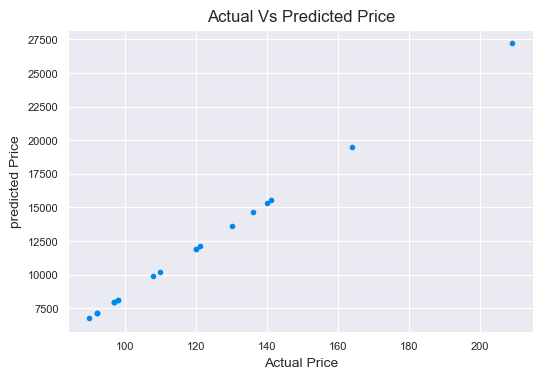

In [166]:
plt.scatter(X_test,Y_test)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual Vs Predicted Price")                          #Plotted Actual Vs Predicted price of Test data
plt.show()

In [183]:
res = pd.DataFrame(Y_test)
res.to_csv('C:/D drive/sharan personal/INSAID GCD PROGRAMME/Data Science Projects/Machine Learning Projects/Used car prediction/submission.csv',index=False,header=False)